#🛠️ Preparación de los Datos

### Bibliotecas necesarias

In [807]:
import  pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline as imbpipeline




##Importación de datos

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [808]:
archivo='https://github.com/anagonesca/Telecom-2/blob/main/Datos.csv?raw=true'
carpeta='https://github.com/anagonesca/Telecom-2/blob/main/'


### Análisis


In [809]:
archivo='https://github.com/anagonesca/Telecom-2/blob/main/Datos.csv?raw=true'
# carpeta='https://github.com/anagonesca/Telecom-2/blob/main/' # This is not needed

datos=pd.read_csv(archivo) # Use the complete URL from the 'archivo' variable
datos.head()

,customerID,Churn,Genero,Adulto_Mayor,Conyuge,Cargas,Meses_contrato,Servicio_telefonico,Multilineas,Servicio_internet,...,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Contrato,Factura_online,Metodo_pago,Factura_mensual,Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.8


In [810]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7256 non-null   object 
 1   Churn                7256 non-null   int64  
 2   Genero               7256 non-null   object 
 3   Adulto_Mayor         7256 non-null   int64  
 4   Conyuge              7256 non-null   int64  
 5   Cargas               7256 non-null   int64  
 6   Meses_contrato       7256 non-null   int64  
 7   Servicio_telefonico  7256 non-null   int64  
 8   Multilineas          7256 non-null   int64  
 9   Servicio_internet    7256 non-null   int64  
 10  Seguridad_online     7256 non-null   int64  
 11  Respaldo_online      7256 non-null   int64  
 12  Proteccion_equipo    7256 non-null   int64  
 13  Soporte_tecnico      7256 non-null   int64  
 14  TVcable              7256 non-null   int64  
 15  Peliculas_online     7256 non-null   i

### Observaciones:
   La exploración inicial muestra datos numéricos y de texto en buen estado general. Sin embargo, aún faltan algunos ajustes de transformación para avanzar con el análisis.

##Reemplazando datos

La columna "Género" cumple la condición para pasar a binario.

In [811]:
datos['Genero']=datos['Genero'].replace({'Female':0,'Male':1})

## Eliminación de Columnas no necesarias.

Eliminaré las columnas que no aportan valor al análisis ni a los modelos, como los identificadores únicos (ej., ID de cliente). Además de no ayudar a predecir la cancelación, pueden introducir ruido y degradar el rendimiento.
Para el resto de variables, analizaré cada una con distintas técnicas y decidiré si se conserva o se elimina según su aporte real a la predicción.

In [812]:
datos=datos.drop('customerID',axis=1)
datos.head()

,Churn,Genero,Adulto_Mayor,Conyuge,Cargas,Meses_contrato,Servicio_telefonico,Multilineas,Servicio_internet,Seguridad_online,...,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Contrato,Factura_online,Metodo_pago,Factura_mensual,Total,Cuentas_diarias
0,0,0,0,1,1,9,1,0,1,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.2
1,0,1,0,0,0,9,1,1,1,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.0
2,1,1,0,0,0,4,1,0,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.5
3,1,1,1,1,0,13,1,0,1,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.3
4,1,0,1,1,0,3,1,0,1,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.8


## Codificación de datos (pasar todo a números)

Para que los modelos funcionen, convierto las variables de texto a formato numérico usando **one-hot encoding**. Uso `drop_first=True` para evitar columnas redundantes y reducir la colinealidad (esto ayuda al **VIF**). Después de codificar, verifico que todas las columnas queden en tipo numérico.


In [813]:
categoricas = ['Contrato','Metodo_pago']

#one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)
one_hot_enc = make_column_transformer((OneHotEncoder(drop='first',handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__Contrato_One year,onehotencoder__Contrato_Two year,onehotencoder__Metodo_pago_Credit card,onehotencoder__Metodo_pago_Electronic check,onehotencoder__Metodo_pago_Mailed check,remainder__Churn,remainder__Genero,remainder__Adulto_Mayor,remainder__Conyuge,remainder__Cargas,...,remainder__Seguridad_online,remainder__Respaldo_online,remainder__Proteccion_equipo,remainder__Soporte_tecnico,remainder__TVcable,remainder__Peliculas_online,remainder__Factura_online,remainder__Factura_mensual,remainder__Total,remainder__Cuentas_diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.2
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.5
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.3
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.8
7252,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.8
7253,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.7
7254,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.3


In [814]:
datos.columns

Index(['onehotencoder__Contrato_One year', 'onehotencoder__Contrato_Two year',
       'onehotencoder__Metodo_pago_Credit card',
       'onehotencoder__Metodo_pago_Electronic check',
       'onehotencoder__Metodo_pago_Mailed check', 'remainder__Churn',
       'remainder__Genero', 'remainder__Adulto_Mayor', 'remainder__Conyuge',
       'remainder__Cargas', 'remainder__Meses_contrato',
       'remainder__Servicio_telefonico', 'remainder__Multilineas',
       'remainder__Servicio_internet', 'remainder__Seguridad_online',
       'remainder__Respaldo_online', 'remainder__Proteccion_equipo',
       'remainder__Soporte_tecnico', 'remainder__TVcable',
       'remainder__Peliculas_online', 'remainder__Factura_online',
       'remainder__Factura_mensual', 'remainder__Total',
       'remainder__Cuentas_diarias'],
      dtype='object')

###Cambiamos los nombres de las columnas

In [815]:
datos=datos.rename(columns={
       'onehotencoder__Contrato_One year':'Contrato 1 anno',
        'onehotencoder__Contrato_Two year':'Contrato 2 annos',
       'onehotencoder__Metodo_pago_Credit card':'Pago tarjeta credito',
       'onehotencoder__Metodo_pago_Electronic check':'Pago chequera electronica',
       'onehotencoder__Metodo_pago_Mailed check':'Pago cheque',
        'remainder__Churn':'Evasion',
       'remainder__Genero':'Genero',
        'remainder__Adulto_Mayor':'Adulto Mayor',
        'remainder__Conyuge':'Conyuge',
       'remainder__Cargas':'Cargas',
        'remainder__Meses_contrato':'Meses contrato',
        'remainder__Meses_antiguedad':'Meses antiguedad',
       'remainder__Servicio_telefonico':'Servicio telefonico',
       'remainder__Multilineas':'Multiples lineas',
        'remainder__Servicio_internet':'Internet',
        'remainder__Seguridad_online':'Seguridad online',
       'remainder__Respaldo_online':'Respaldo online',
        'remainder__Proteccion_equipo':'Proteccion equipo',
       'remainder__Soporte_tecnico':'Soporte_tecnico',
        'remainder__TVcable':'TVcable',
       'remainder__Peliculas_online':'Peliculas_online',
        'remainder__Factura_online':'Factura_online',
        'remainder__Factura_mensual':'Factura_mes',
       'remainder__Total':'Total',
       'remainder__Cuentas_diarias':'Cuentas diarias'})

datos.head()

# Columnas eliminadas por drop_first (OneHotEncoder)
# - onehotencoder__Contrato_Month-to-month -> "Contrato: mes a mes"
# - onehotencoder__Metodo_pago_Bank transfer -> "Método de pago: transferencia bancaria"


,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Evasion,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.2
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,2.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.5
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.3
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.8


## Separación de datos

Divido el dataset en **entrenamiento** (train) y **prueba** (test)—por ejemplo, 80/20 con `random_state=42`. Entreno y comparo varios modelos usando el set de entrenamiento y, al final, evalúo el **mejor modelo** en el set de prueba para simular cómo se comporta con **datos nunca vistos**.


In [816]:

X=datos.drop('Evasion',axis=1)
y=datos['Evasion']

X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

print(f'Los datos totales son                   {datos.shape[0]}')
print(f'Los datos de X_ent son                      {X_ent.shape[0]}  = (train + val)')
print(f'Los datos de prueba son                 {X_test.shape[0]}')
print(f'Los datos de entrenamiento son   {X_train.shape[0]}')
print(f'Los datos de validación son      {X_val.shape[0]}')


Los datos totales son                   7256
Los datos de X_ent son                      5804  = (train + val)
Los datos de prueba son                 1452
Los datos de entrenamiento son   5223
Los datos de validación son      581


## Verificación de la proporción de cancelación (Evasión)

Calculo el porcentaje de clientes que **cancelaron** vs. los que **permanecen activos** y reviso si hay **desbalance de clases** (por ejemplo, muchos más “No” que “Sí”). Si el desbalance es alto, lo consideraré en el entrenamiento (p. ej., `class_weight='balanced'` o re-muestreo) y al interpretar las métricas.


In [817]:
datos.Evasion.value_counts()


,count
Evasion,
0.0,5387
1.0,1869


In [818]:
datos.Evasion.value_counts(normalize=True)

,proportion
Evasion,
0.0,0.74242
1.0,0.25758


In [819]:
px.histogram(datos, x='Evasion', color='Evasion', barmode='group', color_discrete_sequence=['#EA2264', '#640D5F', '#0D1164'])

### Observación

Hay desbalance entre las clases. Más adelante aplicaré técnicas de balanceo (por ejemplo, `class_weight='balanced'` o re-muestreo) antes de entrenar los modelos.


## Balanceo de clases (solo en entrenamiento)

Para manejar el desbalance, puedo aplicar **undersampling**, **oversampling** o usar **SMOTE** para generar ejemplos sintéticos de la clase minoritaria cuando el desbalance es fuerte.
**Importante:** el balanceo se aplica **solo al conjunto de entrenamiento** (el test se deja intacto) para evaluar el modelo de forma realista.


###Oversampling

In [820]:
oversample=SMOTE(random_state=5)
X_bal_over,y_bal_over=oversample.fit_resample(X_ent,y_ent)



In [821]:
y_bal_over.value_counts()

,count
Evasion,
0.0,4309
1.0,4309


###Undersampling

In [822]:
undersample=NearMiss(version=3)
X_bal_under,y_bal_under=undersample.fit_resample(X_ent,y_ent)



In [823]:
y_bal_under.value_counts()

,count
Evasion,
0.0,1495
1.0,1495


## Normalización o estandarización

Reviso si es necesario **escalar** las variables según el modelo a usar.

* Para modelos basados en **distancia** o que dependen de la escala (KNN, SVM, **Regresión Logística**, **Redes Neuronales**), aplico un escalado: por ejemplo, `StandardScaler` (media=0, varianza=1) o `MinMaxScaler` \[0,1].
* En modelos **basados en árboles** (Decision Tree, Random Forest, XGBoost), la escala no es determinante, así que la normalización no es obligatoria.


In [824]:
datos.shape

(7256, 24)

In [825]:
columnas=datos.columns
columnas

Index(['Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Evasion', 'Genero',
       'Adulto Mayor', 'Conyuge', 'Cargas', 'Meses contrato',
       'Servicio telefonico', 'Multiples lineas', 'Internet',
       'Seguridad online', 'Respaldo online', 'Proteccion equipo',
       'Soporte_tecnico', 'TVcable', 'Peliculas_online', 'Factura_online',
       'Factura_mes', 'Total', 'Cuentas diarias'],
      dtype='object')

In [826]:
normalizacion=MinMaxScaler()

datos_normalizado=normalizacion.fit_transform(datos)
datos_normalizado=pd.DataFrame(datos_normalizado,columns=columnas)
datos_normalizado


,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Evasion,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.470588
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.411765
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239,0.558824
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670,0.794118
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556,0.352941
7252,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043,0.647059
7253,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,0.323529
7254,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831,0.500000


## Análisis de correlación

Genero y reviso la **matriz de correlación** (solo variables numéricas) para detectar relaciones fuertes. Me fijo especialmente en las variables con mayor correlación frente a **`Churn`**, porque pueden ser buenas candidatas para el modelo. Si encuentro pares muy correlacionados entre sí, lo anoto para evitar problemas de **multicolinealidad** más adelante.


In [827]:
datos_corr=datos.corr().round(2)
datos_corr

,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Evasion,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
Contrato 1 anno,1.00,-0.29,0.07,-0.11,-0.00,-0.17,0.01,-0.05,0.08,0.07,...,0.10,0.09,0.10,0.10,0.06,0.07,-0.05,0.01,0.18,0.01
Contrato 2 annos,-0.29,1.00,0.17,-0.28,-0.01,-0.29,-0.01,-0.11,0.25,0.20,...,0.19,0.11,0.16,0.24,0.07,0.07,-0.15,-0.08,0.35,-0.08
Pago tarjeta credito,0.07,0.17,1.00,-0.37,-0.29,-0.13,0.00,-0.02,0.08,0.06,...,0.12,0.09,0.11,0.12,0.04,0.05,-0.01,0.03,0.18,0.03
Pago chequera electronica,-0.11,-0.28,-0.37,1.00,-0.39,0.29,0.00,0.17,-0.08,-0.15,...,-0.11,0.00,-0.00,-0.11,0.15,0.14,0.21,0.28,-0.06,0.27
Pago cheque,-0.00,-0.01,-0.29,-0.39,1.00,-0.09,0.01,-0.15,-0.10,0.06,...,-0.08,-0.17,-0.19,-0.09,-0.25,-0.25,-0.21,-0.38,-0.30,-0.38
Evasion,-0.17,-0.29,-0.13,0.29,-0.09,1.00,-0.01,0.15,-0.15,-0.16,...,-0.17,-0.08,-0.06,-0.16,0.06,0.06,0.19,0.19,-0.19,0.19
Genero,0.01,-0.01,0.00,0.00,0.01,-0.01,1.00,-0.00,-0.00,0.01,...,-0.02,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.01
Adulto Mayor,-0.05,-0.11,-0.02,0.17,-0.15,0.15,-0.00,1.00,0.02,-0.21,...,-0.04,0.07,0.06,-0.06,0.10,0.12,0.16,0.22,0.10,0.22
Conyuge,0.08,0.25,0.08,-0.08,-0.10,-0.15,-0.00,0.02,1.00,0.45,...,0.14,0.14,0.15,0.12,0.12,0.12,-0.01,0.10,0.32,0.10
Cargas,0.07,0.20,0.06,-0.15,0.06,-0.16,0.01,-0.21,0.45,1.00,...,0.08,0.02,0.01,0.06,-0.01,-0.04,-0.11,-0.11,0.06,-0.11


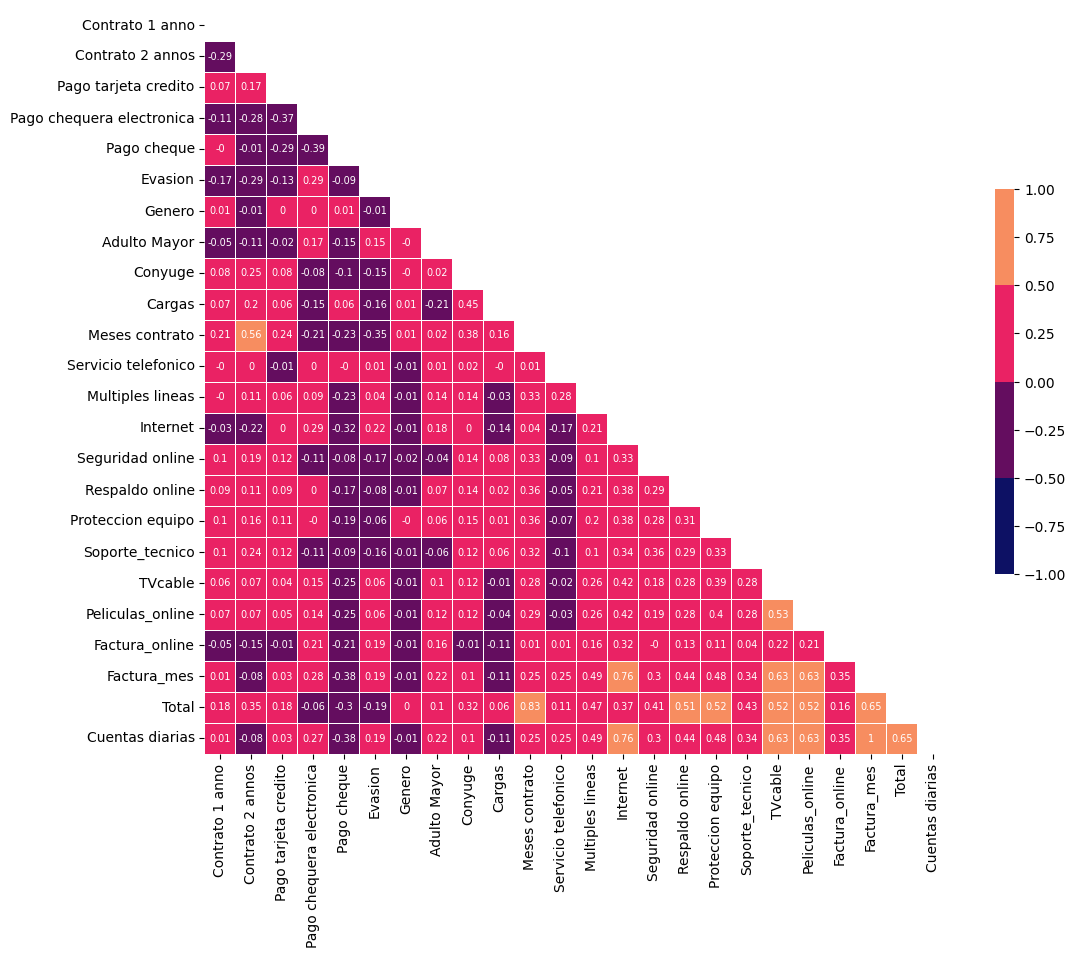

In [828]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = ListedColormap(['#0D1164', '#640D5F', '#EA2264', '#F78D60'])

sns.heatmap(datos_corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el mapa de calor (heatmap)
plt.show()

In [829]:
#Correlación con la Evasión
datos_corr_evasion=datos.corr()['Evasion'].sort_values(ascending=False)
datos_corr_evasion

,Evasion
Evasion,1.000000
Pago chequera electronica,0.294181
Internet,0.223755
Factura_mes,0.189393
Cuentas diarias,0.188396
Factura_online,0.186309
Adulto Mayor,0.146400
TVcable,0.062456
Peliculas_online,0.060092
Multiples lineas,0.039277


In [830]:
#Correlación con la Evasión en valores absolutos
datos_corr_evasion=datos_corr_evasion.abs().sort_values(ascending=False)
datos_corr_evasion

,Evasion
Evasion,1.000000
Meses contrato,0.345799
Contrato 2 annos,0.294467
Pago chequera electronica,0.294181
Internet,0.223755
Total,0.194440
Factura_mes,0.189393
Cuentas diarias,0.188396
Factura_online,0.186309
Contrato 1 anno,0.174340


In [831]:
#Elije las columnas con correlación mayor al 15% considerando los valores absolutos
filtro=datos_corr_evasion[datos_corr_evasion.abs()>0.15]
#Elije las columnas con correlación menor al 15% para eliminarlas de DF
elimina=datos_corr_evasion[datos_corr_evasion.abs()<0.15]
datos_corr_evasion=filtro
datos_corr_evasion

,Evasion
Evasion,1.000000
Meses contrato,0.345799
Contrato 2 annos,0.294467
Pago chequera electronica,0.294181
Internet,0.223755
Total,0.194440
Factura_mes,0.189393
Cuentas diarias,0.188396
Factura_online,0.186309
Contrato 1 anno,0.174340


In [832]:
#Columnas que pueden ser eliminadas por tener una baja correlación con la varible dependiente 8Evasión)
elimina

,Evasion
Conyuge,0.148106
Adulto Mayor,0.146400
Pago tarjeta credito,0.131448
Pago cheque,0.089198
Respaldo online,0.080211
Proteccion equipo,0.063479
TVcable,0.062456
Peliculas_online,0.060092
Multiples lineas,0.039277
Servicio telefonico,0.012337


In [833]:
datos_corr_filtrado=datos.drop(elimina.index,axis=1)
datos_corr=datos_corr_filtrado
datos_corr


,Contrato 1 anno,Contrato 2 annos,Pago chequera electronica,Evasion,Cargas,Meses contrato,Internet,Seguridad online,Soporte_tecnico,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,1.0,1.0,65.60,593.30,2.2
1,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,59.90,542.40,2.0
2,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,73.90,280.85,2.5
3,0.0,0.0,1.0,1.0,0.0,13.0,1.0,0.0,0.0,1.0,98.00,1237.85,3.3
4,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,83.90,267.40,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,1.0,0.0,55.15,742.90,1.8
7252,0.0,0.0,1.0,1.0,0.0,22.0,1.0,0.0,0.0,1.0,85.10,1873.70,2.8
7253,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,50.30,92.75,1.7
7254,0.0,1.0,0.0,0.0,1.0,67.0,1.0,1.0,1.0,0.0,67.85,4627.65,2.3


In [834]:
datos_corr_filtrado=datos_corr_filtrado.corr().round(2)
datos_corr_filtrado.shape

(13, 13)

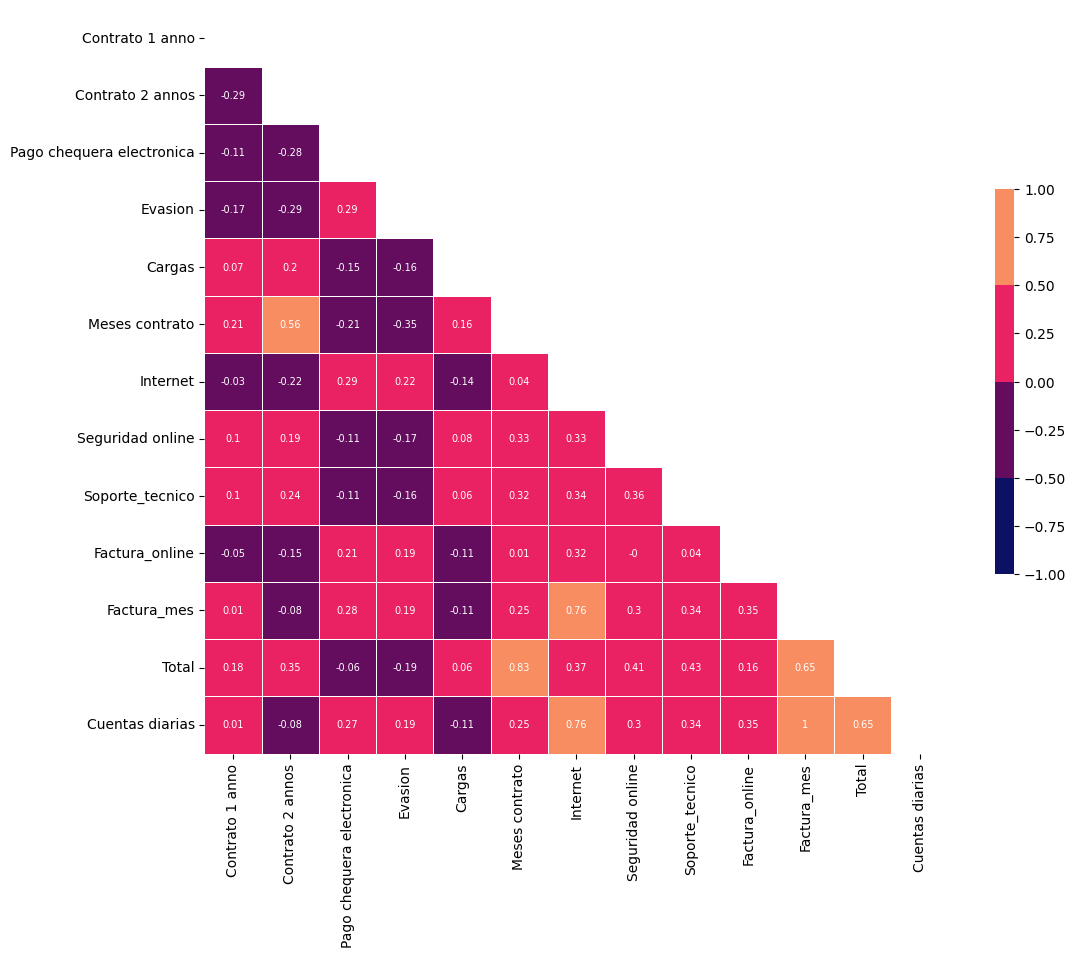

In [835]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_corr_filtrado, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = ListedColormap(['#0D1164', '#640D5F', '#EA2264', '#F78D60'])

sns.heatmap(datos_corr_filtrado, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el mapa de calor (heatmap)
plt.show()


## Análisis dirigido

Analizo cómo algunas variables se relacionan con la **cancelación (churn)**, enfocándome en pares clave como:

* **Tiempo/Tipo de contrato × Cancelación**
* **Gasto total × Cancelación**

El objetivo es detectar patrones útiles para el modelo y priorizar variables con mayor impacto.


In [836]:
datos[['Evasion','Meses contrato']].corr()

,Evasion,Meses contrato
Evasion,1.000000,-0.345799
Meses contrato,-0.345799,1.000000


In [837]:
import plotly.express as px

px.box(datos, x='Meses contrato', color='Evasion', color_discrete_sequence=['#0D1164', '#640D5F', '#EA2264', '#F78D60'])

In [838]:
datos[['Evasion','Total']].corr()

,Evasion,Total
Evasion,1.00000,-0.19444
Total,-0.19444,1.00000


In [839]:
px.box(datos, x='Total', color='Evasion', color_discrete_sequence=['#0D1164', '#640D5F', '#EA2264', '#F78D60'])

## Análisis VIF (multicolinealidad)

Calculo el **VIF (Variance Inflation Factor)** sobre las variables numéricas (después de escalar) para detectar multicolinealidad. La interpretación será:

* **VIF < 5** → sin problema.
* **5 ≤ VIF ≤ 10** → posible colinealidad; revisar.
* **VIF > 10** → multicolinealidad alta; considerar eliminar o combinar variables.




In [840]:
X_norm=datos_normalizado.drop('Evasion',axis=1)
y_norm=datos_normalizado['Evasion']
X_const=add_constant(X_norm)
X_const

,const,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.470588
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.411765
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239,0.558824
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670,0.794118
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556,0.352941
7252,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043,0.647059
7253,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,0.323529
7254,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831,0.500000


In [841]:
columnas=X_const.columns
columnas

Index(['const', 'Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Genero', 'Adulto Mayor',
       'Conyuge', 'Cargas', 'Meses contrato', 'Servicio telefonico',
       'Multiples lineas', 'Internet', 'Seguridad online', 'Respaldo online',
       'Proteccion equipo', 'Soporte_tecnico', 'TVcable', 'Peliculas_online',
       'Factura_online', 'Factura_mes', 'Total', 'Cuentas diarias'],
      dtype='object')

In [842]:
VIF1=pd.DataFrame()
VIF1['Variables']=columnas
VIF1['VIF']=[variance_inflation_factor(X_const[columnas],i) for i in range(len(columnas))]
VIF1.sort_values(by='VIF',ascending=False)

,Variables,VIF
21,Factura_mes,1178.144815
23,Cuentas diarias,1156.987860
0,const,45.032664
22,Total,10.839416
10,Meses contrato,7.585493
13,Internet,5.430134
2,Contrato 2 annos,2.650691
11,Servicio telefonico,2.392631
19,Peliculas_online,2.085056
18,TVcable,2.077513


In [843]:
columnas2=['const','Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Genero', 'Adulto Mayor',
       'Conyuge', 'Cargas','Servicio telefonico','Internet',
       'Multiples lineas',  'Seguridad online', 'Respaldo online','Meses contrato',
       'Proteccion equipo', 'Soporte_tecnico', 'TVcable', 'Peliculas_online',
       'Factura_online',  'Total']
#Eliminadas
#'Factura_mes','Cuentas diarias',    Cuentas es irrelevante ya que fue creada de cuenta mensual. Factura mes se refleja en Total


In [844]:
VIF2=pd.DataFrame()
VIF2['Variables']=columnas2
VIF2['VIF']=[variance_inflation_factor(X_const[columnas2],i) for i in range(len(columnas2))]
VIF2.sort_values(by='VIF',ascending=False)

,Variables,VIF
0,const,38.592298
21,Total,9.038388
15,Meses contrato,6.972744
2,Contrato 2 annos,2.637988
11,Internet,2.608589
4,Pago chequera electronica,1.963770
5,Pago cheque,1.843386
19,Peliculas_online,1.737096
18,TVcable,1.724732
1,Contrato 1 anno,1.615216


In [845]:
datos_vif=pd.DataFrame()
for i in columnas2:
  if i in datos.columns:
    datos_vif[i]=datos[i]
datos_vif

,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Genero,Adulto Mayor,Conyuge,Cargas,Servicio telefonico,...,Multiples lineas,Seguridad online,Respaldo online,Meses contrato,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Total
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,593.30
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,542.40
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,280.85
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,13.0,1.0,0.0,1.0,1.0,1.0,1237.85
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,742.90
7252,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,1873.70
7253,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,92.75
7254,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,67.0,1.0,1.0,0.0,1.0,0.0,4627.65


## Resumen de preparación de datos

Después de los análisis, dejé definidos los conjuntos así:

* `datos`: dataset original.
* `X`: todas las columnas excepto la objetivo (`Churn`/`Evasión`).
* `y`: variable objetivo (`Churn`/`Evasión`, binaria).
* `X_ent`, `y_ent`: conjunto de entrenamiento inicial.
* `X_test`, `y_test`: conjunto de prueba.
* `X_train`, `y_train`: subconjunto de entrenamiento (tras partición).
* `X_val`, `y_val`: conjunto de validación.

**Balanceo:**

* `X_bal_over`, `y_bal_over`: entrenamiento balanceado con **SMOTE** (oversampling).
* `X_bal_under`, `y_bal_under`: entrenamiento balanceado con **NearMiss** (undersampling).

**Transformaciones:**

* `datos_normalizados`: datos con **escalado/normalización** aplicado (según el modelo).
* `datos_corr`: versión filtrada por **correlación** (se eliminaron variables con baja relación con la objetivo o redundantes entre sí).
* `datos_vif`: versión filtrada por **VIF** (se removieron variables con alta multicolinealidad).

Con estos conjuntos compararé el desempeño de los modelos para observar cómo varía según cada preparación.


# 🤖 Entrenamiento y modelado predictivo

## Separación de datos (original, correlación, VIF)

Para evaluar el rendimiento, separo **cada versión del dataset** (original, filtrado por correlación y filtrado por VIF) en **entrenamiento** y **prueba**. Uso **80/20** por defecto (también puede ser **70/30** según el tamaño), con **estratificación** en la variable objetivo para mantener la proporción de cancelación.

> Nota: la división base ya se generó en la etapa de balanceo; aquí **reutilizo esas particiones** para comparar modelos de forma justa.


In [846]:
datos.shape

(7256, 24)

In [847]:
datos_corr.shape

(7256, 13)

In [848]:
datos_vif.shape

(7256, 21)

In [849]:
#Datos originales
X=datos.drop('Evasion',axis=1)
y=datos['Evasion']
X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

#Datos Correlacion
X_c=datos_corr.drop('Evasion',axis=1)
y_c=datos_corr['Evasion']
X_corr,X_test_corr,y_corr,y_test_corr=train_test_split(X_c,y_c,test_size=0.2,random_state=5,stratify=y_c)
X_train_corr,X_val_corr,y_train_corr,y_val_corr=train_test_split(X_corr,y_corr,test_size=0.1,random_state=5,stratify=y_corr)

##Datos VIF
X_v=datos_vif
y_v=datos['Evasion']
X_vif,X_test_vif,y_vif,y_test_vif=train_test_split(X_v,y_v,test_size=0.2,random_state=5,stratify=y_v)
X_train_vif,X_val_vif,y_train_vif,y_val_vif=train_test_split(X_vif,y_vif,test_size=0.1,random_state=5,stratify=y_vif)


#Datos Normalizados
X_n=datos_normalizado.drop('Evasion',axis=1)
y_n=datos_normalizado['Evasion']
X_norm,X_test_norm,y_norm,y_test_norm=train_test_split(X_n,y_n,test_size=0.2,random_state=5,stratify=y_n)
X_train_norm,X_val_norm,y_train_norm,y_val_norm=train_test_split(X_norm,y_norm,test_size=0.1,random_state=5,stratify=y_norm)

## Normalización de datos (original, correlación, VIF)

Escalo las variables para que estén en la **misma escala**. Lo hago **después** del split (train/test) y dentro de un **Pipeline** usando `StandardScaler` o `MinMaxScaler`, según el caso. Repito el proceso para las tres versiones del dataset: **original**, **filtrado por correlación** y **filtrado por VIF**.


In [850]:
#Los datos fueron separados anteriormente en la etapara de balanceo

normalizacion=MinMaxScaler()
label_encoder = LabelEncoder()

#Datos originales
X_norm=normalizacion.fit_transform(X)
X_ent_norm=normalizacion.fit_transform(X_ent)
X_train_norm=normalizacion.fit_transform(X_train)
X_val_norm=normalizacion.fit_transform(X_val)
X_test_norm=normalizacion.transform(X_test)
y_norm = label_encoder.fit_transform(y)


#Datos con análisis de correlación
X_norm_corr=normalizacion.fit_transform(X_corr)
X_train_norm_corr=normalizacion.fit_transform(X_train_corr)
X_val_norm_corr=normalizacion.fit_transform(X_val_corr)
X_test_norm_corr=normalizacion.transform(X_test_corr)

#Datos con análisis de VIF
X_norm_vif=normalizacion.fit_transform(X_vif)
X_train_norm_vif=normalizacion.fit_transform(X_train_vif)
X_val_norm_vif=normalizacion.fit_transform(X_val_vif)
X_test_norm_vif=normalizacion.transform(X_test_vif)

## Creación de modelos (análisis de precisión)

Voy a entrenar **al menos dos modelos** para predecir la cancelación:

* **Modelo 1 (sensible a escala)**: *Regresión Logística* o *KNN* → lo pondré en un **Pipeline con normalización** (`StandardScaler` o `MinMaxScaler`).
* **Modelo 2 (no sensible a escala)**: *Árbol de Decisión* o *Random Forest* → **sin normalización**.

**Por qué:**

* *Regresión Logística / KNN* usan coeficientes o distancias, por eso la **escala** afecta el resultado.
* *Árbol / Random Forest* no dependen de la magnitud de las variables, así que la normalización no es necesaria.

> Nota: también puedo probar ambos con y sin normalización para comparar, pero en general **solo normalizo** cuando el algoritmo lo requiere.

###Modelo de Arbol

In [851]:

modelo_arbol=DecisionTreeClassifier(max_depth=10,random_state=5)
modelo_arbol_corr=DecisionTreeClassifier(max_depth=10,random_state=5)
modelo_arbol_vif=DecisionTreeClassifier(max_depth=10,random_state=5)


####Precisión datos originales

In [852]:
modelo_arbol.fit(X_train,y_train)
print(f'La exactitud del modelo de entrenamiento de Arbol es de: {modelo_arbol.score(X_train,y_train)*100:.2f}%')
print(f'La exactitud del modelo de validación de Arbol es de: {modelo_arbol.score(X_val,y_val)*100:.2f}%')

La exactitud del modelo de entrenamiento de Arbol es de: 87.15%
La exactitud del modelo de validación de Arbol es de: 76.76%


####Precisión datos con análisis de correlación

In [853]:
modelo_arbol_corr.fit(X_train_corr,y_train_corr)
print(f'La exactitud del modelo de entrenamiento de Arbol es de: {modelo_arbol_corr.score(X_train_corr,y_train_corr)*100:.2f}%')
print(f'La exactitud del modelo de validación de Arbol es de: {modelo_arbol_corr.score(X_val_corr,y_val_corr)*100:.2f}%')

La exactitud del modelo de entrenamiento de Arbol es de: 87.25%
La exactitud del modelo de validación de Arbol es de: 75.39%


####Precisión datos con análisis de multicoleanidad (VIF)

In [854]:
modelo_arbol_vif.fit(X_train_vif,y_train_vif)
print(f'La exactitud del modelo de entrenamiento de Arbol es de: {modelo_arbol_vif.score(X_train_vif,y_train_vif)*100:.2f}%')
print(f'La exactitud del modelo de validación de Arbol es de: {modelo_arbol_vif.score(X_val_vif,y_val_vif)*100:.2f}%')

La exactitud del modelo de entrenamiento de Arbol es de: 86.39%
La exactitud del modelo de validación de Arbol es de: 76.59%


### Modelo Random Forest

In [855]:
modelo_random=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_random_corr=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_random_vif=RandomForestClassifier(max_depth = 10,random_state=5)


####Precisión datos originales

In [856]:
modelo_random.fit(X_train,y_train)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_random.score(X_train,y_train)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_random.score(X_val,y_val)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 87.23%
La exactitud del modelo de validación de Random Forest es de: 80.03%


####Precisión datos con análisis de correlación

In [857]:
modelo_random_corr.fit(X_train_corr,y_train_corr)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_random_corr.score(X_train_corr,y_train_corr)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_random_corr.score(X_val_corr,y_val_corr)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 86.96%
La exactitud del modelo de validación de Random Forest es de: 79.17%


####Precisión datos con aálisis de multicoleanidad (VIF)

In [858]:
modelo_random_vif.fit(X_train_vif,y_train_vif)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_random_vif.score(X_train_vif,y_train_vif)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_random_vif.score(X_val_vif,y_val_vif)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 86.79%
La exactitud del modelo de validación de Random Forest es de: 79.00%


### Modelo KNN

Para KNN usaré **datos normalizados**, porque el algoritmo se basa en **distancias** entre observaciones. Si las variables están en escalas distintas, una puede dominar la métrica y sesgar el resultado. Por eso aplico `StandardScaler` (o `MinMaxScaler`) antes de entrenar y luego ajusto `n_neighbors` con validación.


In [859]:
modelo_knn=KNeighborsClassifier()
modelo_knn_corr=KNeighborsClassifier()
modelo_knn_vif=KNeighborsClassifier()

####Precisión datos originales

In [860]:
modelo_knn.fit(X_train_norm,y_train)

print(f'La exactitud del modelo de entrenamiento KNN es de: {modelo_knn.score(X_train_norm,y_train)*100:.2f}%')
print(f'La exactitud del modelo de validación de KNN es de: {modelo_knn.score(X_val_norm,y_val)*100:.2f}%')

La exactitud del modelo de entrenamiento KNN es de: 83.09%
La exactitud del modelo de validación de KNN es de: 74.87%


####Precisión datos con análisis de correlación

In [861]:
modelo_knn_corr.fit(X_train_norm_corr,y_train_corr)

print(f'La exactitud del modelo de entrenamiento KNN es de: {modelo_knn_corr.score(X_train_norm_corr,y_train_corr)*100:.2f}%')
print(f'La exactitud del modelo de validación de KNN es de: {modelo_knn_corr.score(X_val_norm_corr,y_val_corr)*100:.2f}%')

La exactitud del modelo de entrenamiento KNN es de: 84.86%
La exactitud del modelo de validación de KNN es de: 76.08%


####Precisión datos con aálisis de multicoleanidad (VIF)

In [862]:
modelo_knn_vif.fit(X_train_norm_vif,y_train_vif)

print(f'La exactitud del modelo de entrenamiento KNN es de: {modelo_knn_vif.score(X_train_norm_vif,y_train_vif)*100:.2f}%')
print(f'La exactitud del modelo de validación de KNN es de: {modelo_knn_vif.score(X_val_norm_vif,y_val_vif)*100:.2f}%')

La exactitud del modelo de entrenamiento KNN es de: 83.27%
La exactitud del modelo de validación de KNN es de: 75.22%


## Evaluación de los modelos (analizando otras métricas)

Voy a evaluar cada modelo con estas métricas:

* **Matriz de confusión**
* **Exactitud (accuracy)**
* **Precisión**
* **Recall**
* **F1-score**

Después comparo los resultados y hago un análisis crítico:

* ¿Qué modelo tuvo el mejor desempeño en **test**?
* ¿Hay **overfitting** (muy bien en train, mal en test)? → bajar complejidad/regularizar, usar más datos o validación cruzada.
* ¿Hay **underfitting** (mal en train y test)? → subir complejidad, agregar features o ajustar hiperparámetros.

###Modelos

#### Modelos de Árbol

In [863]:
modelo_arbol.fit(X_train,y_train)
y_previsto_arbol=modelo_arbol.predict(X_val)

modelo_arbol_corr.fit(X_train_corr,y_train_corr)
y_previsto_arbol_corr=modelo_arbol_corr.predict(X_val_corr)

modelo_arbol_vif.fit(X_train_vif,y_train_vif)
y_previsto_arbol_vif=modelo_arbol_vif.predict(X_val_vif)

#### Modelos de Random forest

In [864]:
modelo_random.fit(X_train,y_train)
y_previsto_rf=modelo_random.predict(X_val)

modelo_random_corr.fit(X_train_corr,y_train_corr)
y_previsto_rf_corr=modelo_random_corr.predict(X_val_corr)

modelo_random_vif.fit(X_train_vif,y_train_vif)
y_previsto_rf_vif=modelo_random_vif.predict(X_val_vif)

#### Modelos de KNN

In [865]:
modelo_knn.fit(X_train,y_train)
y_previsto_knn=modelo_knn.predict(X_val)

modelo_knn_corr.fit(X_train_corr,y_train_corr)
y_previsto_knn_corr=modelo_knn_corr.predict(X_val_corr)

modelo_knn_vif.fit(X_train_vif,y_train_vif)
y_previsto_knn_vif=modelo_knn_vif.predict(X_val_vif)

###Matriz de confusión

####Modelo de Árbol

In [866]:
matriz_confusion=confusion_matrix(y_val,y_previsto_arbol)
matriz_confusion

array([[369,  62],
       [ 73,  77]])

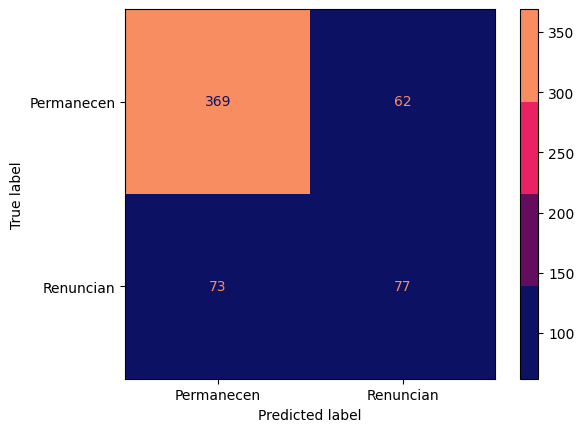

In [867]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Definir la paleta de colores de Color Hunt
colores = ['#0D1164', '#640D5F', '#EA2264', '#F78D60']
cmap = ListedColormap(colores)

# Crear la visualización de la matriz de confusión
visualización = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen', 'Renuncian'])

# Visualizar con la paleta de colores personalizada
visualización.plot(cmap=cmap)

# Mostrar la gráfica
plt.show()

#### Modelo Random Forest

In [868]:
matriz_confusion=confusion_matrix(y_val,y_previsto_rf)
matriz_confusion

array([[388,  43],
       [ 73,  77]])

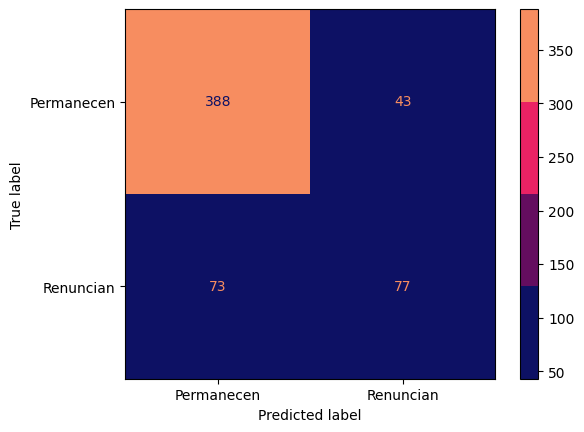

In [869]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Definir la paleta de colores de Color Hunt
colores = ['#0D1164', '#640D5F', '#EA2264', '#F78D60']
cmap = ListedColormap(colores)

# Crear la visualización de la matriz de confusión
visualización = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen', 'Renuncian'])

# Visualizar con la paleta de colores personalizada
visualización.plot(cmap=cmap)

# Mostrar la gráfica
plt.show()

####Modelo KNN

In [870]:
matriz_confusion=confusion_matrix(y_val,y_previsto_knn)
matriz_confusion


array([[376,  55],
       [ 83,  67]])

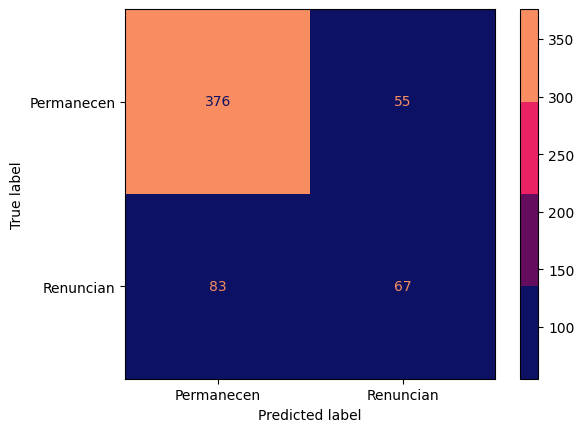

In [871]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Definir la paleta de colores de Color Hunt
colores = ['#0D1164', '#640D5F', '#EA2264', '#F78D60']
cmap = ListedColormap(colores)

# Crear la visualización de la matriz de confusión
visualización = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen', 'Renuncian'])

# Visualizar con la paleta de colores personalizada
visualización.plot(cmap=cmap)

# Mostrar la gráfica
plt.show()

###Informe de Métricas

####Calculo por variable

In [872]:
def calcular_metricas(y_test,y_pred):

  metricas = {'accuracy':accuracy_score(y_test,y_pred),
              'recall':recall_score(y_test,y_pred),
              'precision':precision_score(y_test,y_pred),
               'f1':f1_score(y_test,y_pred)
                }
  return metricas

In [873]:
#Modelo de Arbol
calcular_metricas(y_val,y_previsto_arbol)

{'accuracy': 0.7676419965576592,
 'recall': 0.5133333333333333,
 'precision': 0.5539568345323741,
 'f1': 0.532871972318339}

In [874]:
#Modelo Random Forest
calcular_metricas(y_val,y_previsto_rf)

{'accuracy': 0.8003442340791739,
 'recall': 0.5133333333333333,
 'precision': 0.6416666666666667,
 'f1': 0.5703703703703704}

In [875]:
#Modelo KNN
calcular_metricas(y_val,y_previsto_knn)

{'accuracy': 0.7624784853700516,
 'recall': 0.44666666666666666,
 'precision': 0.5491803278688525,
 'f1': 0.49264705882352944}

####Calculo concentrado

In [876]:
#Modelo de Arbol
print('El informe de métricas para el modelo de Arbol es :')
print(classification_report(y_val,y_previsto_arbol))

El informe de métricas para el modelo de Arbol es :
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       431
         1.0       0.55      0.51      0.53       150

    accuracy                           0.77       581
   macro avg       0.69      0.68      0.69       581
weighted avg       0.76      0.77      0.76       581



In [877]:
#Modelo Random Forest
print('El informe de métricas para el modelo Random Forest es :')
print(classification_report(y_val,y_previsto_rf))

El informe de métricas para el modelo Random Forest es :
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       431
         1.0       0.64      0.51      0.57       150

    accuracy                           0.80       581
   macro avg       0.74      0.71      0.72       581
weighted avg       0.79      0.80      0.79       581



In [878]:

#Modelo KNN
print('El informe de métricas para el modelo KNN es :')
print(classification_report(y_val,y_previsto_knn))

El informe de métricas para el modelo KNN es :
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       431
         1.0       0.55      0.45      0.49       150

    accuracy                           0.76       581
   macro avg       0.68      0.66      0.67       581
weighted avg       0.75      0.76      0.75       581



### Curva ROC

#### Modelo de Arbol

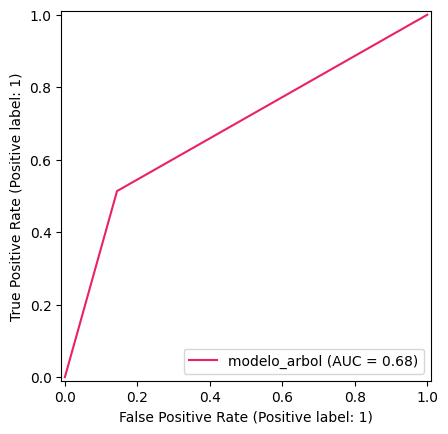

In [879]:
RocCurveDisplay.from_predictions(y_val,y_previsto_arbol,name='modelo_arbol',color='#EA2264')

####Modelo Random Forest

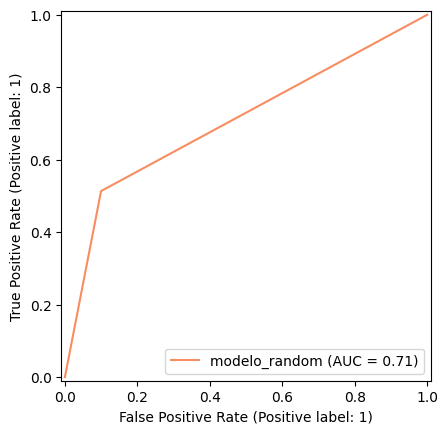

In [880]:
RocCurveDisplay.from_predictions(y_val,y_previsto_rf,name='modelo_random', color='#F78D60');

####Modelo KNN

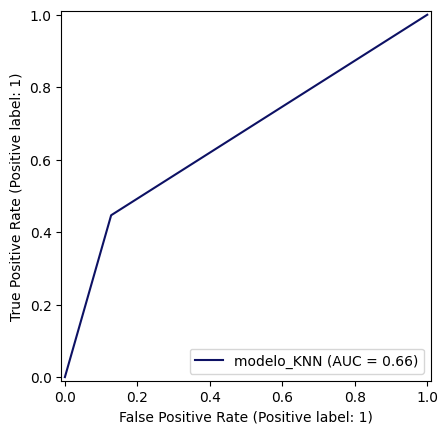

In [881]:
RocCurveDisplay.from_predictions(y_val,y_previsto_knn,name='modelo_KNN', color = '#0D1164')

### Validación cruzada

Usaré **validación cruzada estratificada** con **k=5** para mantener la proporción de churn en cada partición. En cada fold entreno con 4/5 y valido con 1/5, calculo el **recall** y al final reporto el **promedio** (y su variabilidad).
Después estimaré un **intervalo de confianza** (p. ej., 95%) para el **recall** para medir cuán estable es el desempeño del modelo.


In [882]:
def intervalo_confianza(resultado):
  promedio=resultado.mean()
  desv_standar=resultado.std()
  print(f'La media para el recall es: {(promedio*100).round(2)} %')
  print(f'El desvío estandar es: {(desv_standar*100).round(2)} %')
  print(f'El intervalo de confianza es de {promedio*100-2*desv_standar*100:.2f}% a {min(promedio*100+2*desv_standar*100,100):.2f}%')


#### Modelo de Árbol

In [883]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_arbol = cross_validate(modelo_arbol, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_arbol

{'fit_time': array([0.03507781, 0.03508282, 0.03404593, 0.03521442, 0.04056358]),
 'score_time': array([0.01790166, 0.01519012, 0.01479053, 0.01436138, 0.01464772]),
 'test_accuracy': array([0.7786391 , 0.76658053, 0.76055125, 0.74849268, 0.75      ]),
 'test_recall': array([0.48829431, 0.48160535, 0.52173913, 0.50501672, 0.5083612 ]),
 'test_precision': array([0.584     , 0.55384615, 0.53608247, 0.51186441, 0.51525424]),
 'test_f1': array([0.53187614, 0.51520572, 0.52881356, 0.50841751, 0.51178451])}

In [884]:
intervalo_confianza(cv_resultados_arbol['test_recall'])

La media para el recall es: 50.1 %
El desvío estandar es: 1.44 %
El intervalo de confianza es de 47.22% a 52.98%


#### Modelo Random Forest

In [885]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_random = cross_validate(modelo_random, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_random


{'fit_time': array([0.81142879, 0.55702066, 0.48098493, 0.46523643, 0.48233843]),
 'score_time': array([0.04621911, 0.0305984 , 0.03212023, 0.02974486, 0.03272104]),
 'test_accuracy': array([0.80964686, 0.8044789 , 0.79758829, 0.791559  , 0.80344828]),
 'test_recall': array([0.4916388 , 0.48160535, 0.47491639, 0.46153846, 0.53177258]),
 'test_precision': array([0.68055556, 0.66666667, 0.64545455, 0.63013699, 0.6437247 ]),
 'test_f1': array([0.57087379, 0.5592233 , 0.54720617, 0.53281853, 0.58241758])}

In [886]:
intervalo_confianza(cv_resultados_random['test_recall'])

La media para el recall es: 48.83 %
El desvío estandar es: 2.38 %
El intervalo de confianza es de 44.06% a 53.60%


#### Modelo KNN

In [887]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_knn = cross_validate(modelo_knn, X_norm, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_knn


{'fit_time': array([0.00220346, 0.00218678, 0.00190091, 0.00220823, 0.00193691]),
 'score_time': array([0.05772614, 0.05763507, 0.05910325, 0.05662918, 0.05951095]),
 'test_accuracy': array([0.76584022, 0.73880083, 0.7567195 , 0.75189524, 0.75396278]),
 'test_recall': array([0.4973262 , 0.47453083, 0.46791444, 0.48663102, 0.48395722]),
 'test_precision': array([0.55029586, 0.49166667, 0.53191489, 0.52      , 0.52463768]),
 'test_f1': array([0.52247191, 0.48294679, 0.49786629, 0.50276243, 0.50347705])}

In [888]:
intervalo_confianza(cv_resultados_knn['test_recall'])

La media para el recall es: 48.21 %
El desvío estandar es: 1.01 %
El intervalo de confianza es de 46.18% a 50.24%


### Validación cruzada con Balanceo de datos usando la pipeline

#### Modelo de Árbol

In [889]:
pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('Arbol',modelo_arbol)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_over = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_over


{'fit_time': array([0.06064224, 0.06013966, 0.06157231, 0.06143284, 0.06589389]),
 'score_time': array([0.01186848, 0.0117352 , 0.011657  , 0.01865458, 0.01177478]),
 'test_accuracy': array([0.77605512, 0.74332472, 0.77347115, 0.74246339, 0.74051724]),
 'test_recall': array([0.66220736, 0.45150502, 0.57190635, 0.53177258, 0.59531773]),
 'test_precision': array([0.55462185, 0.50185874, 0.55882353, 0.5       , 0.4972067 ]),
 'test_f1': array([0.60365854, 0.47535211, 0.56528926, 0.51539708, 0.54185693])}

In [890]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('Arbol',modelo_arbol)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under


{'fit_time': array([0.06136084, 0.05837107, 0.05812049, 0.06084895, 0.05764127]),
 'score_time': array([0.0116868 , 0.01234293, 0.01182246, 0.01225924, 0.01152849]),
 'test_accuracy': array([0.70628768, 0.67269595, 0.69853575, 0.67355728, 0.67758621]),
 'test_recall': array([0.68561873, 0.64214047, 0.68227425, 0.55852843, 0.68561873]),
 'test_precision': array([0.45353982, 0.41290323, 0.44444444, 0.40338164, 0.42268041]),
 'test_f1': array([0.54593875, 0.5026178 , 0.53825858, 0.4684432 , 0.52295918])}

In [891]:
intervalo_confianza(cv_resultados_over['test_recall'])

La media para el recall es: 56.25 %
El desvío estandar es: 6.98 %
El intervalo de confianza es de 42.29% a 70.22%


In [892]:
intervalo_confianza(cv_resultados_under['test_recall'])

La media para el recall es: 65.08 %
El desvío estandar es: 4.9 %
El intervalo de confianza es de 55.28% a 74.88%


####Modelo Random Forest

In [893]:
#modelo_random=RandomForestClassifier(max_depth = 7,random_state=5)
pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('random forest',modelo_random)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_over = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_over


{'fit_time': array([0.82500315, 0.82265544, 0.79765487, 0.81519437, 0.83725953]),
 'score_time': array([0.03082585, 0.03079987, 0.03076172, 0.03059363, 0.03125787]),
 'test_accuracy': array([0.80534022, 0.791559  , 0.80620155, 0.77347115, 0.78189655]),
 'test_recall': array([0.62207358, 0.60200669, 0.63210702, 0.57190635, 0.62541806]),
 'test_precision': array([0.62207358, 0.59405941, 0.62171053, 0.55882353, 0.57012195]),
 'test_f1': array([0.62207358, 0.59800664, 0.62686567, 0.56528926, 0.59649123])}

In [894]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('random forest',modelo_random)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under


{'fit_time': array([0.37492347, 0.37979436, 0.3585465 , 0.37814999, 0.35872746]),
 'score_time': array([0.03081417, 0.03047729, 0.02957964, 0.03364706, 0.02975726]),
 'test_accuracy': array([0.7751938 , 0.76830319, 0.75968992, 0.73815676, 0.73793103]),
 'test_recall': array([0.66889632, 0.66555184, 0.69230769, 0.63545151, 0.6722408 ]),
 'test_precision': array([0.55248619, 0.54076087, 0.52538071, 0.49350649, 0.49385749]),
 'test_f1': array([0.60514372, 0.59670165, 0.5974026 , 0.55555556, 0.5694051 ])}

In [895]:
intervalo_confianza(cv_resultados_over['test_recall'])

La media para el recall es: 61.07 %
El desvío estandar es: 2.18 %
El intervalo de confianza es de 56.70% a 65.44%


In [896]:
intervalo_confianza(cv_resultados_under['test_recall'])

La media para el recall es: 66.69 %
El desvío estandar es: 1.83 %
El intervalo de confianza es de 63.04% a 70.34%


####Model KNN

In [897]:
pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('KNN',modelo_knn)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_over = cross_validate(pipeline, X_norm, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_over


{'fit_time': array([0.02160406, 0.02067661, 0.02088022, 0.02097917, 0.02050877]),
 'score_time': array([0.0822649 , 0.07926536, 0.07937312, 0.0830934 , 0.0954628 ]),
 'test_accuracy': array([0.70867769, 0.69882839, 0.68642316, 0.678153  , 0.66988284]),
 'test_recall': array([0.74331551, 0.6997319 , 0.6684492 , 0.69518717, 0.72727273]),
 'test_precision': array([0.45950413, 0.44539249, 0.4302926 , 0.42414356, 0.41910632]),
 'test_f1': array([0.56792646, 0.544317  , 0.52356021, 0.52684904, 0.53176931])}

In [898]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('KNN',modelo_knn)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under = cross_validate(pipeline, X_norm, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under

{'fit_time': array([0.06341243, 0.05883145, 0.09640312, 0.09752846, 0.09708595]),
 'score_time': array([0.03796268, 0.06303883, 0.05923367, 0.05961466, 0.05816102]),
 'test_accuracy': array([0.684573  , 0.66161268, 0.68711234, 0.678153  , 0.68435562]),
 'test_recall': array([0.62032086, 0.61126005, 0.61229947, 0.62299465, 0.63101604]),
 'test_precision': array([0.42335766, 0.39721254, 0.42565056, 0.41681574, 0.42446043]),
 'test_f1': array([0.5032538 , 0.48152059, 0.50219298, 0.49946409, 0.50752688])}

In [899]:
intervalo_confianza(cv_resultados_over['test_recall'])

La media para el recall es: 70.68 %
El desvío estandar es: 2.61 %
El intervalo de confianza es de 65.46% a 75.90%


In [900]:
intervalo_confianza(cv_resultados_under['test_recall'])

La media para el recall es: 61.96 %
El desvío estandar es: 0.73 %
El intervalo de confianza es de 60.50% a 63.41%


##Resumen

###Modelos sin balanceo de datos

In [901]:
resultados=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
modelos={'modelo_arbol':[y_previsto_arbol,y_val], 'modelo_arbol_corr':[y_previsto_arbol_corr,y_val_corr],'modelo_arbol_vif':[y_previsto_arbol_vif,y_val_vif],
         'modelo_random':[y_previsto_rf,y_val], 'modelo_random_corr':[y_previsto_rf_corr,y_val_corr],'modelo_random_vif':[y_previsto_rf_vif,y_val_vif],
         'modelo_knn':[y_previsto_knn,y_val], 'modelo_knn_corr':[y_previsto_knn_corr,y_val_corr],'modelo_knn_vif':[y_previsto_knn_vif,y_val_vif]
         }

for m, v in modelos.items():
  #modelo_arbol.fit(X_train,y_train)
  #y_previsto_arbol=modelo_arbol.predict(X_val)
  metricas = calcular_metricas(v[1],v[0])
  resultados[m] = list(metricas.values())

resultados=resultados.T
resultados.sort_values(by='recall',ascending=False)



,accuracy,recall,precision,f1
modelo_arbol,0.767642,0.513333,0.553957,0.532872
modelo_arbol_corr,0.753873,0.513333,0.523810,0.518519
modelo_random,0.800344,0.513333,0.641667,0.570370
modelo_random_corr,0.791738,0.513333,0.616000,0.560000
modelo_random_vif,0.790017,0.493333,0.616667,0.548148
modelo_knn_vif,0.765921,0.466667,0.555556,0.507246
modelo_arbol_vif,0.765921,0.453333,0.557377,0.500000
modelo_knn,0.762478,0.446667,0.549180,0.492647
modelo_knn_corr,0.759036,0.446667,0.540323,0.489051


#### Observación

Con los resultados obtenidos, los modelos con **mayor accuracy (exactitud)** y **recall** son:

1. `modelo_random` — **mejor desempeño general**
2. `modelo_arbol`
3. `modelo_arbol_corr`

> Aunque `modelo_arbol` y `modelo_arbol_corr` están cerca, `modelo_random` logra el mejor equilibrio entre exactitud y cobertura.




###Modelos con balanceo de datos

In [902]:
from ctypes import c_char
df_resultados=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])

#modelo_arbol.fit(X_ent, y_ent)
#y_previsto_arbol=modelo_arbol.predict(X_val)

modelos_over={'modelo_arbol_over':[modelo_arbol,X_ent, y_ent],
              'modelo_arbol_over_corr':[modelo_arbol_corr,X_corr, y_corr],
              'modelo_arbol_vif':[modelo_arbol_vif,X_vif, y_vif],
              'modelo_random_over':[modelo_random,X_ent, y_ent],
              'modelo_random_over_corr':[modelo_random_corr,X_corr, y_corr],
              'modelo_random_over_vif':[modelo_random_vif,X_vif, y_vif],
              'modelo_knn_over':[modelo_knn,X_norm, y],
              'modelo_knn_over_corr':[modelo_knn_corr,X_norm_corr, y_corr],
              'modelo_knn_over_vif':[modelo_knn_vif,X_norm_vif, y_vif]

         }
modelos_under={'modelo_arbol_under':[modelo_arbol,X_ent, y_ent],
              'modelo_arbol_under_corr':[modelo_arbol_corr,X_corr, y_corr],
              'modelo_arbol_vif':[modelo_arbol_vif,X_vif, y_vif],
              'modelo_random_under':[modelo_random,X_ent, y_ent],
              'modelo_random_under_corr':[modelo_random_corr,X_corr, y_corr],
              'modelo_random_under_vif':[modelo_random_vif,X_vif, y_vif],
              'modelo_knn_under':[modelo_knn,X_norm, y],
              'modelo_knn_under_corr':[modelo_knn_corr,X_norm_corr, y_corr],
              'modelo_knn_under_vif':[modelo_knn_vif,X_norm_vif, y_vif]
         }

def promedios(resultados):
  prom_accuracy=resultados['test_accuracy'].mean()
  prom_recall=resultados['test_recall'].mean()
  prom_precision=resultados['test_precision'].mean()
  prom_f1=resultados['test_f1'].mean()
  return {'accuracy':prom_accuracy,'recall':prom_recall,'precision':prom_precision,'f1':prom_f1}

for m, v in modelos_over.items():
  #print(v[0])
  pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('Modelo',v[0])]) #Recibe datos en lissta y dentro de estoen tuplas
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
  cv_resultados_over = cross_validate(pipeline, v[1], v[2], cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
#cv_resultados_over
  df_resultados[m] = list(promedios(cv_resultados_over).values())

for m, v in modelos_under.items():
  #print(v[0])
  pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('Modelo',v[0])]) #Recibe datos en lissta y dentro de estoen tuplas
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
  cv_resultados_under = cross_validate(pipeline, v[1], v[2], cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
  df_resultados[m]=list(promedios(cv_resultados_under).values())



df_resultados=df_resultados.T
df_resultados['prom acc-recall']=df_resultados[['accuracy','recall']].mean(axis=1)
df_resultados['prom total']=df_resultados.mean(axis=1)
df_resultados.sort_values(by='recall',ascending=False)


,accuracy,recall,precision,f1,prom acc-recall,prom total
modelo_knn_over,0.688393,0.706791,0.435688,0.538884,0.697592,0.613470
modelo_knn_over_vif,0.677463,0.698328,0.423477,0.527138,0.687895,0.602860
modelo_knn_over_corr,0.726567,0.679599,0.478741,0.561405,0.703083,0.629879
modelo_random_under_vif,0.745347,0.674916,0.504577,0.577304,0.710132,0.642455
modelo_random_under,0.755855,0.666890,0.521198,0.584842,0.711372,0.648031
modelo_arbol_vif,0.686078,0.662876,0.429399,0.520895,0.674477,0.594745
modelo_random_under_corr,0.749997,0.660870,0.511999,0.576668,0.705433,0.640993
modelo_arbol_under,0.685733,0.650836,0.427390,0.515644,0.668284,0.589577
modelo_arbol_under_corr,0.700206,0.639465,0.444396,0.523598,0.669836,0.595500
modelo_knn_under,0.679161,0.619578,0.417499,0.498792,0.649370,0.572880


#### Observación

Con los datos balanceados, **KNN** logra el **mayor recall**. Sin embargo, para seleccionar el modelo tomé el **promedio entre accuracy y recall** (las métricas son muy cercanas entre modelos). Bajo ese criterio, el mejor desempeño lo obtiene **`modelo_random_under_vif`** por su mejor equilibrio entre cobertura y exactitud.

### ¿Cuál modelo tuvo el mejor desempeño?

El mejor desempeño lo obtuvo **Random Forest**, usando el pipeline con **undersampling** sobre los datos filtrados por **VIF** (mejor equilibrio entre *accuracy* y *recall*).



### ¿Algún modelo presentó overfitting o underfitting?

No se observó overfitting ni underfitting claros. La brecha entre las métricas de **entrenamiento** y **validación** se mantuvo dentro de un rango **≈10–11%**, considerado aceptable para este experimento.


## Análisis del modelo campeón (validación)

El **modelo campeón** será **Random Forest** entrenado sobre los datos **filtrados por VIF** y **balanceados con undersampling**. Con este modelo haré la validación final (k-fold estratificado y conjunto de prueba) y reportaré **accuracy, precision, recall, F1 y ROC-AUC**, además de **matriz de confusión** e **importancia de variables**, para confirmar que mantiene el mejor desempeño y estabilidad.


In [903]:
#Balanceo de datos VIF
undersample=NearMiss(version=3)
X_vif_bal_under,y_vif_bal_under=undersample.fit_resample(X_vif,y_vif)
X_train_vif_bal_under,y_train_vif_bal_under=undersample.fit_resample(X_train_vif,y_train_vif)
X_test_vif_bal_under,y_test_vif_bal_under=undersample.fit_resample(X_test_vif,y_test_vif)
X_val_vif_bal_under,y_val_vif_bal_under=undersample.fit_resample(X_val_vif,y_val_vif)

#Aplicando modelo RandomForest
modelo_champion=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_champion.fit(X_train_vif_bal_under,y_train_vif_bal_under)
y_previsto_ch=modelo_champion.predict(X_test_vif_bal_under)
#Obteniendo las métricas
metricas_ch=calcular_metricas(y_test_vif_bal_under,y_previsto_ch)
metricas_ch

{'accuracy': 0.7459893048128342,
 'recall': 0.6497326203208557,
 'precision': 0.804635761589404,
 'f1': 0.7189349112426036}

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77       374
         1.0       0.80      0.65      0.72       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.74       748
weighted avg       0.76      0.75      0.74       748



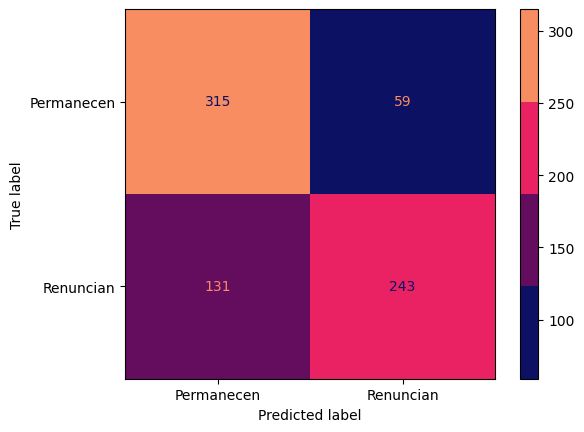

In [904]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#matriz de confusion
matriz_confusion=confusion_matrix(y_test_vif_bal_under,y_previsto_ch)
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualizacion.plot(cmap=ListedColormap(['#0D1164', '#640D5F', '#EA2264', '#F78D60']))
print(classification_report(y_test_vif_bal_under,y_previsto_ch))



In [905]:
#Modelo Random Forest con datos filtrados de acuerdo al análisis de vif
modelo_champion=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_champion.fit(X_train_vif_bal_under,y_train_vif_bal_under)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_champion.score(X_train_vif_bal_under,y_train_vif_bal_under)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_champion.score(X_test_vif_bal_under,y_test_vif_bal_under)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 88.07%
La exactitud del modelo de validación de Random Forest es de: 74.60%


In [906]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('random forest',modelo_champion)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under_ch = cross_validate(pipeline, X_vif, y_vif, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under_ch

{'fit_time': array([0.50895309, 0.53795624, 0.52159309, 0.49997211, 0.32490301]),
 'score_time': array([0.04184151, 0.04885769, 0.04982233, 0.03127098, 0.03079295]),
 'test_accuracy': array([0.75193798, 0.75538329, 0.75366064, 0.72782084, 0.73793103]),
 'test_recall': array([0.66555184, 0.66555184, 0.7090301 , 0.66220736, 0.6722408 ]),
 'test_precision': array([0.51421189, 0.51958225, 0.51581509, 0.47941889, 0.49385749]),
 'test_f1': array([0.58017493, 0.58357771, 0.5971831 , 0.55617978, 0.5694051 ])}

In [907]:
intervalo_confianza(cv_resultados_under_ch['test_recall'])

La media para el recall es: 67.49 %
El desvío estandar es: 1.74 %
El intervalo de confianza es de 64.02% a 70.96%


#📋 Interpretación y Conclusiones

## Resumen del modelado (Parte 2)

A partir de los datos limpios de la etapa **Telecom_X** (`datos_tratados.csv`), ejecuté el flujo de **modelado predictivo** para estimar la **Evasión (Churn)**.  
El objetivo principal fue **maximizar el *recall*** para detectar la mayor cantidad posible de clientes que cancelan.

### Conjuntos analizados
- `datos` → dataset original.  
- `datos_corr` → filtrado tras **análisis de correlación**.  
- `datos_vif` → filtrado tras **análisis de VIF** (multicolinealidad).

En cada conjunto probé los modelos:
- **Árbol de Decisión**
- **Random Forest**
- **KNN**

Además, a cada conjunto le apliqué **balanceo de clases** y repetí el entrenamiento/evaluación.

---

### Modelo seleccionado (champion)
El mejor equilibrio entre *accuracy* y, sobre todo, **recall** lo entregó **Random Forest** con:
- datos **filtrados por VIF** y  
- **undersampling** en entrenamiento.  

> Modelo campeón: **`modelo_random_under_vif`**

**Evaluación:**
- **Validación (cross/val interno)**  
  - Accuracy: **74.53%** (0.745347)  
  - **Recall:** **67.49%** (0.674916)
- **Prueba final (`X_test`)**  
  - Accuracy: **74.60%** (0.745989)  
  - **Recall:** **64.97%** (0.649732)  
  - **IC (95%) para el recall:** **64.02% – 70.96%**

> Nota: es esperable una leve caída de *recall* al pasar de validación a prueba, ya que **X_test** no se usó durante el entrenamiento.

---

### Hallazgos (correlación)
Variables con mayor relación con la **Evasión**:
- **Meses de contrato (tenure):** a mayor tiempo en la compañía, **menor riesgo de renuncia**; el efecto es más claro en **contratos ≥ 1 año**.  
- **Medios de pago (chequera electrónica / factura online):** estos métodos se asocian con **mayor permanencia**.

---

### Recomendación
- **Incentivar contratos de largo plazo** (≥ 1 año) para reducir el churn temprano.  
- **Promover pago automático y facturación electrónica** (bonos/descuentos de adopción) y, si es posible, **desincentivar** métodos menos estables.









##Profundizando en el modelo champion

###Análisis de la Importancia de las Variables del Champion

In [908]:
datos_vif.columns

Index(['Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Genero', 'Adulto Mayor',
       'Conyuge', 'Cargas', 'Servicio telefonico', 'Internet',
       'Multiples lineas', 'Seguridad online', 'Respaldo online',
       'Meses contrato', 'Proteccion equipo', 'Soporte_tecnico', 'TVcable',
       'Peliculas_online', 'Factura_online', 'Total'],
      dtype='object')

In [909]:
len(datos_vif.columns)

21

In [910]:
#Importancai de variables en modelo random forest elegido  (Solo valores de X)
importancia_ch=modelo_champion.feature_importances_
importancia_ch

array([0.04453257, 0.04299058, 0.01481709, 0.041436  , 0.01526454,
       0.02222434, 0.02048886, 0.02204988, 0.02287791, 0.01275726,
       0.00754859, 0.02022077, 0.05053149, 0.02297961, 0.2852929 ,
       0.01813631, 0.05143801, 0.02153222, 0.02037011, 0.03257302,
       0.20993794])

In [911]:
importancia_ch=pd.DataFrame({'Variables explicativas':X_vif.columns,'Importancia':(importancia_ch*100).round(2)}).sort_values(by='Importancia',ascending=False)
importancia_ch

,Variables explicativas,Importancia
14,Meses contrato,28.53
20,Total,20.99
16,Soporte_tecnico,5.14
12,Seguridad online,5.05
0,Contrato 1 anno,4.45
1,Contrato 2 annos,4.30
3,Pago chequera electronica,4.14
19,Factura_online,3.26
13,Respaldo online,2.30
8,Cargas,2.29


In [912]:
len(importancia_ch)

21

###Cantidad de features necesarios

In [913]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5)
ct_features=[i if i!=0 else 1 for i in range(0,22,3)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_vif_bal_under[selected_features]
  X_test_sel = X_test_vif_bal_under[selected_features]
  modelo_champion_var.fit(X_train_sel, y_vif_bal_under)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(y_test_vif_bal_under,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

,1,3,6,9,12,15,18,21
accuracy,0.696524,0.719251,0.716578,0.717914,0.724599,0.736631,0.743316,0.735294
recall,0.489305,0.558824,0.668449,0.639037,0.652406,0.652406,0.649733,0.641711
precision,0.835616,0.822835,0.739645,0.758730,0.762500,0.784566,0.799342,0.789474
f1,0.617201,0.665605,0.702247,0.693759,0.703170,0.712409,0.716814,0.707965


In [914]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5)
ct_features=[i if i!=0 else 1 for i in range(12,16,1)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_vif_bal_under[selected_features]
  X_test_sel = X_test_vif_bal_under[selected_features]
  modelo_champion_var.fit(X_train_sel, y_vif_bal_under)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(y_test_vif_bal_under,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

,12,13,14,15
accuracy,0.724599,0.731283,0.735294,0.736631
recall,0.652406,0.636364,0.652406,0.652406
precision,0.762500,0.785479,0.782051,0.784566
f1,0.703170,0.703102,0.711370,0.712409


###Selección de variables

Considerando solo el análisis del recall y el accuracy, se dejan 14 variables como parte del modelo.


In [915]:
#Df final quedaría con las siguientes columnas
selected_features = importancia_ch['Variables explicativas'].values[:14]
X_selected_feautures=X[selected_features]
X_selected_feautures

,Meses contrato,Total,Soporte_tecnico,Seguridad online,Contrato 1 anno,Contrato 2 annos,Pago chequera electronica,Factura_online,Respaldo online,Cargas,Genero,Conyuge,TVcable,Adulto Mayor
0,9.0,593.30,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,9.0,542.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,280.85,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13.0,1237.85,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,3.0,267.40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13.0,742.90,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,22.0,1873.70,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7253,2.0,92.75,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7254,67.0,4627.65,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [916]:
X_selected_feautures.columns

Index(['Meses contrato', 'Total', 'Soporte_tecnico', 'Seguridad online',
       'Contrato 1 anno', 'Contrato 2 annos', 'Pago chequera electronica',
       'Factura_online', 'Respaldo online', 'Cargas', 'Genero', 'Conyuge',
       'TVcable', 'Adulto Mayor'],
      dtype='object')

In [917]:
datos_ch=X_selected_feautures.copy()
datos_ch['Evasion']=y
datos_ch



,Meses contrato,Total,Soporte_tecnico,Seguridad online,Contrato 1 anno,Contrato 2 annos,Pago chequera electronica,Factura_online,Respaldo online,Cargas,Genero,Conyuge,TVcable,Adulto Mayor,Evasion
0,9.0,593.30,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,9.0,542.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.0,280.85,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,13.0,1237.85,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,3.0,267.40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13.0,742.90,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,22.0,1873.70,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7253,2.0,92.75,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7254,67.0,4627.65,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


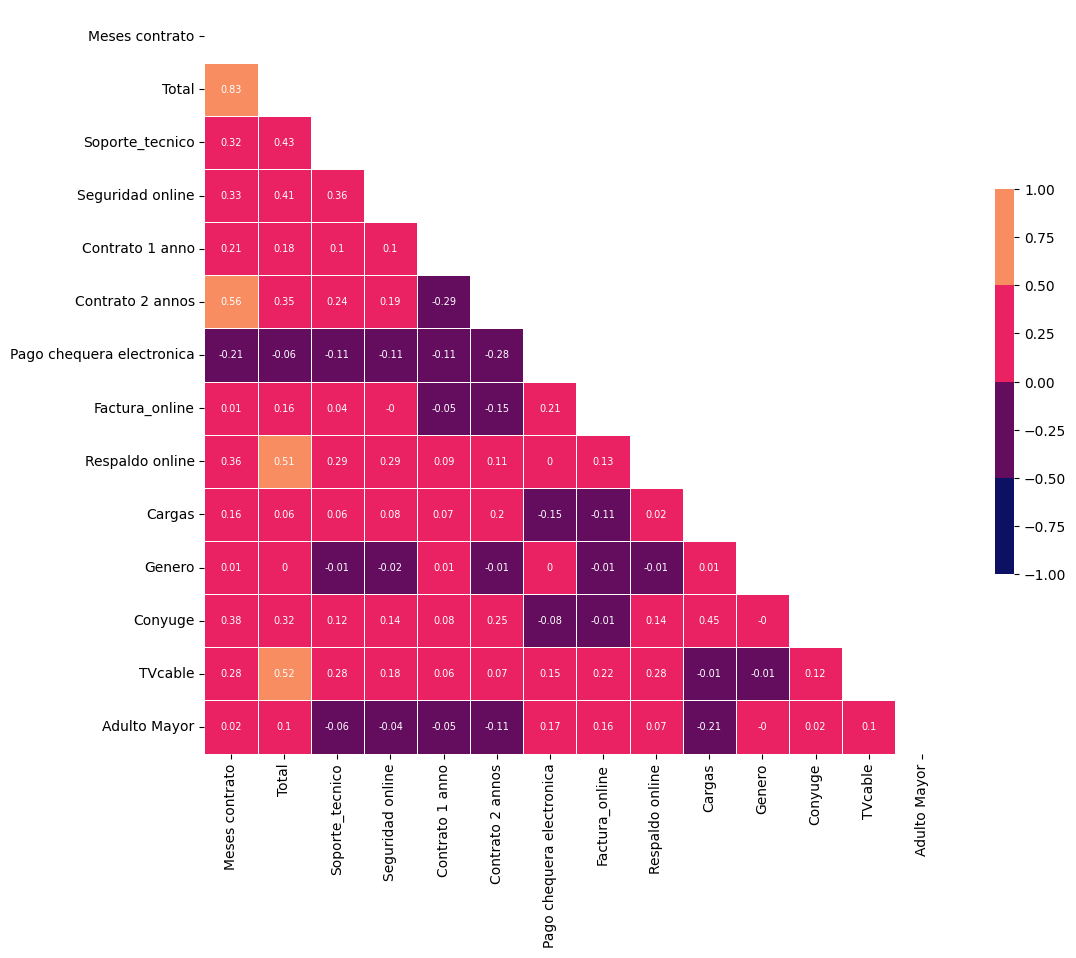

In [918]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

datos_ch_corr=X_selected_feautures.corr().round(2)
datos_ch_corr

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_ch_corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = ListedColormap(['#0D1164', '#640D5F', '#EA2264', '#F78D60'])

sns.heatmap(datos_ch_corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el mapa de calor (heatmap)
plt.show()

In [919]:
#Correlación con la Evasión
datos_ch_evasion=datos_ch.corr()['Evasion'].sort_values(ascending=False)
datos_ch_evasion

,Evasion
Evasion,1.000000
Pago chequera electronica,0.294181
Factura_online,0.186309
Adulto Mayor,0.146400
TVcable,0.062456
Genero,-0.009494
Respaldo online,-0.080211
Conyuge,-0.148106
Cargas,-0.160347
Soporte_tecnico,-0.160476


##Guardando el modelo para reutilizar

In [920]:
from pathlib import Path
import pickle

def guardar_modelo(objeto_modelo, ruta="modelo_champion.pkl"):
    ruta = Path(ruta)
    try:
        # Serializa con el protocolo más alto y escribe de una vez
        ruta.write_bytes(pickle.dumps(objeto_modelo, protocol=pickle.HIGHEST_PROTOCOL))
    except Exception as exc:
        print(f"Se produjo un error al guardar el modelo: {exc}")
    else:
        print(f"Modelo guardado correctamente en: {ruta.resolve()}")

guardar_modelo(modelo_champion)

Modelo guardado correctamente en: /content/modelo_champion.pkl
